#  Data Analysis Project on Israeli Protests on Twitter

This project focuses on analyzing public opinion on the ongoing protests in Israel using Twitter data. Twitter is a social network and an important source of real-time information it can be used to gauge public sentiment on a variety of topics. The protests in Israel have been ongoing for a number of weeks and relate to the change/reform/revolution that the government led by Benyamin Netanyahu is promoting, which causes great controversy among the Israeli public.

To gather Twitter data, I used Tweepy, a Python library for accessing the Twitter API. I searched for tweets containing specific keywords related to the protests in Israel, such as "protest," "government," and "democracy." I also filtered out retweets to ensure that our dataset only contained original tweets.

Next, I used sentiment analysis to determine the overall sentiment of each tweet. Sentiment analysis is a natural language processing (NLP) technique that involves using machine learning algorithms to identify and classify the sentiment expressed in a piece of text. In this project, I used the VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool, which is specifically designed for social media text and is trained on a large corpus of social media data.

Analyzing the sentiment of tweets related to the ongoing protests in Israel provides us with valuable insights into public opinion on this critical issue. The sentiment analysis allows us to understand whether people are expressing positive, negative, or neutral emotions toward the protests and specific issues.  The sentiment analysis can also help us understand the underlying causes of the protests, such as government policies or social injustice, and aid in developing long-term solutions to these issues. Overall, the sentiment analysis of Twitter data is a powerful tool for gaining insights into public opinion on the ongoing protests in Israel.

Throughout this project, I aim to gain valuable insights into various aspects related to the ongoing protests in Israel using Twitter data:

1. Examining the characteristics of Twitter users involved in this case study, including their demographics and behavior, to better understand the context in which these protests are occurring.
2. Analyzing the most frequently used words in the tweets and identifying the emotions that characterize them, provides valuable insights into the prevailing sentiment surrounding the protests.
3. Identify significant trends or patterns in the tweets or user characteristics, helping to shed light on the underlying causes and motivations behind the ongoing protests in Israel.

In [ ]:
import tweepy
import pandas as pd
import time
import datetime
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import string
from nltk.corpus import stopwords
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
!pip install gender_guesser
import gender_guesser.detector as gender
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import collections
import seaborn as sns
import pytz
from collections import Counter

# Data Collection

* Twitter keys and Tokens

In [811]:
consumer_key = 'nSQXZxmx5ek5VPRFyLC4dviby'
consumer_secret = 'bwLtQlaG6do3WvNHdN6huxqMq4cYpWUecmBkiyc8Mbe5T9VYH3'
access_token = '1519986038390894592-PUwovEr5DcezfHG4rePufUjowKPAEn'
access_token_secret = 'u4BX5nwtOjlZItiz0GOYnEIQ8jStAtruNunjLi5T94mTB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [812]:
keyword = 'Israel'
tweets = api.search_tweets(q=keyword, lang='en', count=10)
for tweet in tweets:
    print(f'{tweet.user.name} said: {tweet.text}')

حاتم :3 said: RT @terrelljstarr: I’m leaving Israel now. I’ve seen a lot in the past week. Palestinians are living under an apartheid state. I wasn’t emo…
Adam Albilya - אדם אלביליה said: RT @AdamAlbilya: An indictment was filed against a 32yo resident of Ramallah for a serious assault in Israel

 Illegally crossing through t…
Adam Albilya - אדם אלביליה said: RT @AdamAlbilya: In a conversation with foreign ambassadors in Israel, the director general of the Ministry of Foreign Affairs stated:

 "I…
1000 words 4 Israel said: RT @irlisrAlliance: Despite Ben &amp; Jerry’s stated commitment to social justice causes and its attempted boycott of Israel, the company now f…
🕎 Monica ✡️ 🇦🇺🇮🇱 #endJewHatred #ghostbanned said: RT @Dretchy: @AndrewF39444004 @DanStreetmenti2 @GogoIsrael2 @IreadMad @Malka2929 @logicandreasonn @butchdjinn @AlisonT7 @Katy_Tel_Aviv @Rob…
Jerry Egerue said: @renoomokri Reno soon &amp; very soon Igbos shall be heading home en mass, if God can cause exodus of the Hebrew rac

In [799]:
search_words = "(Israel OR Israeli OR #Israel) AND (supreme OR today OR judicial OR overhaul\
OR protest OR reform OR political OR discourse OR Protests OR rights OR situation OR public\
OR court  OR Judicial OR demonstration OR Court OR democracy OR Dictatorship\
OR Right OR Left OR government OR plan OR street OR people OR compromise OR public OR regime\
OR Netanyahu OR benjamin OR Lapid OR minister OR economic OR news OR institute) -filter:retweets"
start_date = "2023-01-03"
end_date = "2023-03-06"
max_tweets = 10000

tweets = tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              since_id=start_date,
              until=end_date,
              tweet_mode='extended').items(max_tweets)

tweet_data = []

for tweet in tweets:
    tweet_data.append({
        "id": tweet.id_str,
        "created_at": tweet.created_at,
        "full_text": tweet.full_text,
        "user_screen_name": tweet.user.screen_name,
        "user_location": tweet.user.location,
        "user_followers_count": tweet.user.followers_count,
        "retweet_count": tweet.retweet_count,
        "favorite_count": tweet.favorite_count,
        "lang": tweet.lang,
        "source": tweet.source,
        "name": tweet.user.name,
        "user_description": tweet.user.description,
        "user_friends_count":tweet.user.friends_count,
        "user_statuses_count": tweet.user.statuses_count,
        "user_created_at":tweet.user.created_at,
        "user_verified":tweet.user.verified
    })

while True:
    limit_status = api.rate_limit_status()
    remaining_searches = limit_status['resources']['search']['/search/tweets']['remaining']
    if remaining_searches == 0:
        reset_time = limit_status['resources']['search']['/search/tweets']['reset']
        wait_time = reset_time - time.time() + 10  # Add 10 seconds to be safe
        print(f"Rate limit exceeded. Waiting for {wait_time / 60:.2f} minutes...")
        time.sleep(wait_time)
    else:
        time.sleep(60) 
        break
    
twitter = pd.DataFrame(tweet_data)
twitter.head()


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [954]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 575
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    865 non-null    int64 
 1   created_at            865 non-null    object
 2   full_text             865 non-null    object
 3   user_screen_name      865 non-null    object
 4   user_location         629 non-null    object
 5   user_followers_count  865 non-null    int64 
 6   retweet_count         865 non-null    int64 
 7   favorite_count        865 non-null    int64 
 8   lang                  865 non-null    object
 9   source                865 non-null    object
 10  name                  865 non-null    object
 11  user_description      812 non-null    object
 12  user_friends_count    865 non-null    int64 
 13  user_statuses_count   865 non-null    int64 
 14  user_created_at       865 non-null    object
 15  user_verified         865 non-null    bo

* change columns to date type

In [955]:
twitter['created_at'] = pd.to_datetime(twitter['created_at'])
twitter['user_created_at'] = pd.to_datetime(twitter['user_created_at'])

save to csv

In [740]:
# twitter.to_csv(f"twitter10-18.23.csv", index=False)
current_date = datetime.datetime.now().strftime("%Y-%m-%d")
twitter.to_csv(f"twitter_{current_date}.csv", index=False)

Import data

In [786]:
twitter1 = pd.read_csv(r'c:\Users\Yakir\twitter_2023-03-19.csv')
twitter1.drop('text', axis = 1, inplace = True)
twitter2 = pd.read_csv(r'c:\Users\Yakir\twitter10-18.23.csv')

In [788]:
twitter= pd.concat([twitter1,twitter2]).drop_duplicates()
twitter

,id,created_at,full_text,user_screen_name,user_location,user_followers_count,retweet_count,favorite_count,lang,source,name,user_description,user_friends_count,user_statuses_count,user_created_at,user_verified
0,1635787920312352774,2023-03-14 23:40:06+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms.\nhttps://t.co/3SJZ8b3OUx,WSJopinion,New York,139064,1,3,en,SocialFlow,Wall Street Journal Opinion,Opinion & Commentary from The Wall Street Journal.,160,75831,2007-07-03 13:39:08+00:00,True
1,1635770784391077891,2023-03-14 22:32:00+00:00,"Since late January, hundreds of thousands of Israelis have been loudly protesting an impending judicial overhaul by the nation’s new right-wing government. https://t.co/0zSUSDgczB",MotherJones,NaN,829633,40,83,en,Sprout Social,Mother Jones,"Smart, fearless journalism. Reader-supported since 1976. Thank you for making our work possible!",249,258645,2008-12-31 17:21:13+00:00,True
2,1635768346686676993,2023-03-14 22:22:19+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/T66nB83WQv via @WSJopinion,mike_bomb,NaN,33,0,0,en,Twitter Web App,Michael 🇺🇸 🇮🇱,Happy go lucky fellow,58,11606,2013-11-11 07:25:22+00:00,False
3,1635739600722296847,2023-03-14 20:28:06+00:00,"Let me expand a little bit on my thread (quoted below) on the demographics of the current Israeli leftist protest wave, by delving deeper into the make-up of the Israeli left.\n\nWhat groups is the opposition to Netanyahu's judicial overhaul composed of?\n\nA 🧵. \n\n1/25 https://t.co/ODvBXCX1e4",novussubsole,NaN,323,4,7,en,Twitter Web App,Michael,פוסט-פוסטציוני עם פנים אנושיות.,389,33759,2017-07-17 14:17:43+00:00,False
4,1635731819504042001,2023-03-14 19:57:10+00:00,It’s obscene that the US government is funding demonstrations against Netanyahu’s judicial reform. This is a complete violation of Israeli sovereignty. \n\nHow hypocritical. Election interference at its best!\n\nhttps://t.co/cyIzg1aNn4,GoldsteinBrooke,NaN,34399,27,47,en,Twitter for iPhone,Brooke Goldstein,"Warrior to #EndJewHatred. Mom of 3 Boys. Exec Dir @LawfareProject. Civil Rights Lawyer. Author. Filmmaker. Drummer. ✍️🏻: @WashingtonPost, @Newsweek, @FoxNews",2896,14367,2011-10-20 01:41:21+00:00,True
5,1635718584969363456,2023-03-14 19:04:35+00:00,Israel's judicial reform plan explained. For all those that do not really understand the principles involved. https://t.co/BG2JsO9ogR,RickSmol,"Los Angeles, CA",2112,0,1,en,Twitter for iPad,Rick Smol,"English,Spanish and Hebrew are my spoken languages. Reason is my mother tongue. LAX-TLV. Entrepreneur. Retired Engineer.🇦🇷🇮🇱🇺🇸 נשוי לעיניים ירוקות",1627,82682,2012-11-21 00:37:36+00:00,False
6,1635708688387145738,2023-03-14 18:25:15+00:00,Israel's judicial reform plan explained https://t.co/xaP7bCRuCE,equalwatts,"Kampala, Uganda",395,0,0,en,Twitter for iPhone,Joel Bellenson,NaN,601,5504,2010-03-25 12:56:33+00:00,False
7,1635706997931745280,2023-03-14 18:18:32+00:00,"The Knesset was active late into the night on Monday as Netanyahu's government continued its judicial reform legislation.\n\nWhich bills were passed in the plenum on Monday overnight, and how far along are they in the process of becoming law?\n\n@BreuerEliav \nhttps://t.co/Myzjem4Ayt",Jerusalem_Post,Israel,584473,0,1,en,Twitter Web App,The Jerusalem Post,Israel & world news from the Jewish State's leading and best-selling English newspaper | Newsletter: https://t.co/5UiuB1NXaN | Telegram: https://t.co/PANWpT1Fdo,639,379015,2009-01-25 14:17:26+00:00,True
8,1635700569426755593,2023-03-14 17:53:00+00:00,Explanation of Israel's judicial reform plan\n\n#Israel #IsraelProtests #Netanyahu @netanyahu @IsraeliPM @KnessetIL @itamarbengvir @bezalelsm @LikudParty @yairlapid @gantzbe #IDF @IDF @rothmar \n\nSee more: https://t.co/14rJcB0LQ2 https://t.co/mel4JMvmOH,AgenciaAJN,Argentina,22682,1,1,en,Twitter Web App,Agencia AJN,AJN - News Agency-Agen

# Example of vader_lexicon on a sentence

In [790]:
text_1 = "This is a bad day! I don't like apple"
text_2 = "This is a great day! you love her"

sid = SentimentIntensityAnalyzer()

scores_text_1 = sid.polarity_scores(text_1)
scores_text_2 = sid.polarity_scores(text_2)

print(f'scores text_1 {scores_text_1}')
print(f'scores text_2 {scores_text_2}')

scores text_1 {'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'compound': -0.7097}
scores text_2 {'neg': 0.0, 'neu': 0.368, 'pos': 0.632, 'compound': 0.8622}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yakir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


* Checking the text received in the tweets in order to understand which cleanings need to be done

In [875]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
twitter['full_text']

0                                                                                                                                                                                                             The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms.\nhttps://t.co/3SJZ8b3OUx
1                                                                                                                                                                 Since late January, hundreds of thousands of Israelis have been loudly protesting an impending judicial overhaul by the nation’s new right-wing government. https://t.co/0zSUSDgczB
2                                                                                                                                                                                              The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/T

# Data claning

In [803]:
def remove_urls(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'http\S+', '', text)

def remove_punctuation(text):
    punctuation = set(string.punctuation)
    return ''.join(char for char in text if char not in punctuation)
def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    return ' '.join(token for token in tokens if token.lower() not in stop_words)
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if isinstance(text, str):  
        tokens = word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return ' '.join(lemmatized_tokens)
    else:
        return ''


In [804]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [805]:
# mask = twitter['full_text'].str.startswith("RT @")
# twitter.loc[mask, 'text'] = twitter.loc[mask, 'full_text'].str.replace("RT @", "").str.split(':').str[1]
# twitter['text'] = twitter['text'].str.lower()

twitter['text'] = twitter['full_text'].str.lower()
twitter.drop_duplicates(subset=['full_text'], keep='first', inplace=True)

twitter.head()

,id,created_at,full_text,user_screen_name,user_location,user_followers_count,retweet_count,favorite_count,lang,source,name,user_description,user_friends_count,user_statuses_count,user_created_at,user_verified,text
0,1635787920312352774,2023-03-14 23:40:06+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms.\nhttps://t.co/3SJZ8b3OUx,WSJopinion,New York,139064,1,3,en,SocialFlow,Wall Street Journal Opinion,Opinion & Commentary from The Wall Street Journal.,160,75831,2007-07-03 13:39:08+00:00,True,the netanyahu government may have to compromise to win enough public support to pass durable judicial reforms.\nhttps://t.co/3sjz8b3oux
1,1635770784391077891,2023-03-14 22:32:00+00:00,"Since late January, hundreds of thousands of Israelis have been loudly protesting an impending judicial overhaul by the nation’s new right-wing government. https://t.co/0zSUSDgczB",MotherJones,NaN,829633,40,83,en,Sprout Social,Mother Jones,"Smart, fearless journalism. Reader-supported since 1976. Thank you for making our work possible!",249,258645,2008-12-31 17:21:13+00:00,True,"since late january, hundreds of thousands of israelis have been loudly protesting an impending judicial overhaul by the nation’s new right-wing government. https://t.co/0zsusdgczb"
2,1635768346686676993,2023-03-14 22:22:19+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/T66nB83WQv via @WSJopinion,mike_bomb,NaN,33,0,0,en,Twitter Web App,Michael 🇺🇸 🇮🇱,Happy go lucky fellow,58,11606,2013-11-11 07:25:22+00:00,False,the netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/t66nb83wqv via @wsjopinion
3,1635739600722296847,2023-03-14 20:28:06+00:00,"Let me expand a little bit on my thread (quoted below) on the demographics of the current Israeli leftist protest wave, by delving deeper into the make-up of the Israeli left.\n\nWhat groups is the opposition to Netanyahu's judicial overhaul composed of?\n\nA 🧵. \n\n1/25 https://t.co/ODvBXCX1e4",novussubsole,NaN,323,4,7,en,Twitter Web App,Michael,פוסט-פוסטציוני עם פנים אנושיות.,389,33759,2017-07-17 14:17:43+00:00,False,"let me expand a little bit on my thread (quoted below) on the demographics of the current israeli leftist protest wave, by delving deeper into the make-up of the israeli left.\n\nwhat groups is the opposition to netanyahu's judicial overhaul composed of?\n\na 🧵. \n\n1/25 https://t.co/odvbxcx1e4"
4,1635731819504042001,2023-03-14 19:57:10+00:00,It’s obscene that the US government is funding demonstrations against Netanyahu’s judicial reform. This is a complete violation of Israeli sovereignty. \n\nHow hypocritical. Election interference at its best!\n\nhttps://t.co/cyIzg1aNn4,GoldsteinBrooke,NaN,34399,27,47,en,Twitter for iPhone,Brooke Goldstein,"Warrior to #EndJewHatred. Mom of 3 Boys. Exec Dir @LawfareProject. Civil Rights Lawyer. Author. Filmmaker. Drummer. ✍️🏻: @WashingtonPost, @Newsweek, @FoxNews",2896,14367,2011-10-20 01:41:21+00:00,True,it’s obscene that the us government is funding demonstrations against netanyahu’s judicial reform. this is a complete violation of israeli sovereignty. \n\nhow hypocritical. election interference at its best!\n\nhttps://t.co/cyizg1ann4


* Applying the cleaning functions 

In [806]:
twitter['text'] = twitter['text'].apply(remove_urls)
twitter['text'] = twitter['text'].apply(remove_stopwords)
twitter['text'] = twitter['text'].fillna('').apply(remove_numbers)
twitter['text'] = twitter['text'].apply(lemmatize_text)
twitter['text'] = twitter['text'].fillna('').apply(remove_punctuation)

twitter.head()

,id,created_at,full_text,user_screen_name,user_location,user_followers_count,retweet_count,favorite_count,lang,source,name,user_description,user_friends_count,user_statuses_count,user_created_at,user_verified,text
0,1635787920312352774,2023-03-14 23:40:06+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms.\nhttps://t.co/3SJZ8b3OUx,WSJopinion,New York,139064,1,3,en,SocialFlow,Wall Street Journal Opinion,Opinion & Commentary from The Wall Street Journal.,160,75831,2007-07-03 13:39:08+00:00,True,netanyahu government may compromise win enough public support pas durable judicial reform
1,1635770784391077891,2023-03-14 22:32:00+00:00,"Since late January, hundreds of thousands of Israelis have been loudly protesting an impending judicial overhaul by the nation’s new right-wing government. https://t.co/0zSUSDgczB",MotherJones,NaN,829633,40,83,en,Sprout Social,Mother Jones,"Smart, fearless journalism. Reader-supported since 1976. Thank you for making our work possible!",249,258645,2008-12-31 17:21:13+00:00,True,since late january hundred thousand israeli loudly protesting impending judicial overhaul nation ’ new rightwing government
2,1635768346686676993,2023-03-14 22:22:19+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/T66nB83WQv via @WSJopinion,mike_bomb,NaN,33,0,0,en,Twitter Web App,Michael 🇺🇸 🇮🇱,Happy go lucky fellow,58,11606,2013-11-11 07:25:22+00:00,False,netanyahu government may compromise win enough public support pas durable judicial reform via wsjopinion
3,1635739600722296847,2023-03-14 20:28:06+00:00,"Let me expand a little bit on my thread (quoted below) on the demographics of the current Israeli leftist protest wave, by delving deeper into the make-up of the Israeli left.\n\nWhat groups is the opposition to Netanyahu's judicial overhaul composed of?\n\nA 🧵. \n\n1/25 https://t.co/ODvBXCX1e4",novussubsole,NaN,323,4,7,en,Twitter Web App,Michael,פוסט-פוסטציוני עם פנים אנושיות.,389,33759,2017-07-17 14:17:43+00:00,False,let expand little bit thread quoted demographic current israeli leftist protest wave delving deeper makeup israeli left group opposition netanyahu s judicial overhaul composed 🧵
4,1635731819504042001,2023-03-14 19:57:10+00:00,It’s obscene that the US government is funding demonstrations against Netanyahu’s judicial reform. This is a complete violation of Israeli sovereignty. \n\nHow hypocritical. Election interference at its best!\n\nhttps://t.co/cyIzg1aNn4,GoldsteinBrooke,NaN,34399,27,47,en,Twitter for iPhone,Brooke Goldstein,"Warrior to #EndJewHatred. Mom of 3 Boys. Exec Dir @LawfareProject. Civil Rights Lawyer. Author. Filmmaker. Drummer. ✍️🏻: @WashingtonPost, @Newsweek, @FoxNews",2896,14367,2011-10-20 01:41:21+00:00,True,’ obscene u government funding demonstration netanyahu ’ judicial reform complete violation israeli sovereignty hypocritical election interference best


* Apply the analyzer to each text in the 'text' column and extract the sentiment scores

In [808]:
tw_sentiment = twitter.copy()

analyzer = SentimentIntensityAnalyzer()
sentiment = twitter['text'].apply(lambda text: analyzer.polarity_scores(text))
tw_sentiment[['neg', 'neu', 'pos', 'compound']] = pd.DataFrame(sentiment.tolist(), index=sentiment.index)

tw_sentiment.head()

,id,created_at,full_text,user_screen_name,user_location,user_followers_count,retweet_count,favorite_count,lang,source,...,user_description,user_friends_count,user_statuses_count,user_created_at,user_verified,text,neg,neu,pos,compound
0,1635787920312352774,2023-03-14 23:40:06+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms.\nhttps://t.co/3SJZ8b3OUx,WSJopinion,New York,139064,1,3,en,SocialFlow,...,Opinion & Commentary from The Wall Street Journal.,160,75831,2007-07-03 13:39:08+00:00,True,netanyahu government may compromise win enough public support pas durable judicial reform,0.000,0.606,0.394,0.7579
1,1635770784391077891,2023-03-14 22:32:00+00:00,"Since late January, hundreds of thousands of Israelis have been loudly protesting an impending judicial overhaul by the nation’s new right-wing government. https://t.co/0zSUSDgczB",MotherJones,NaN,829633,40,83,en,Sprout Social,...,"Smart, fearless journalism. Reader-supported since 1976. Thank you for making our work possible!",249,258645,2008-12-31 17:21:13+00:00,True,since late january hundred thousand israeli loudly protesting impending judicial overhaul nation ’ new rightwing government,0.167,0.833,0.000,-0.4215
2,1635768346686676993,2023-03-14 22:22:19+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/T66nB83WQv via @WSJopinion,mike_bomb,NaN,33,0,0,en,Twitter Web App,...,Happy go lucky fellow,58,11606,2013-11-11 07:25:22+00:00,False,netanyahu government may compromise win enough public support pas durable judicial reform via wsjopinion,0.000,0.649,0.351,0.7579
3,1635739600722296847,2023-03-14 20:28:06+00:00,"Let me expand a little bit on my thread (quoted below) on the demographics of the current Israeli leftist protest wave, by delving deeper into the make-up of the Israeli left.\n\nWhat groups is the opposition to Netanyahu's judicial overhaul composed of?\n\nA 🧵. \n\n1/25 https://t.co/ODvBXCX1e4",novussubsole,NaN,323,4,7,en,Twitter Web App,...,פוסט-פוסטציוני עם פנים אנושיות.,389,33759,2017-07-17 14:17:43+00:00,False,let expand little bit thread quoted demographic current israeli leftist protest wave delving deeper makeup israeli left group opposition netanyahu s judicial overhaul composed 🧵,0.079,0.830,0.091,0.0772
4,1635731819504042001,2023-03-14 19:57:10+00:00,It’s obscene that the US government is funding demonstrations against Netanyahu’s judicial reform. This is a complete violation of Israeli sovereignty. \n\nHow hypocritical. Election interference at its best!\n\nhttps://t.co/cyIzg1aNn4,GoldsteinBrooke,NaN,34399,27,47,en,Twitter for iPhone,...,"Warrior to #EndJewHatred. Mom of 3 Boys. Exec Dir @LawfareProject. Civil Rights Lawyer. Author. Filmmaker. Drummer. ✍️🏻: @WashingtonPost, @Newsweek, @FoxNews",2896,14367,2011-10-20 01:41:21+00:00,True,’ obscene u government funding demonstration netanyahu ’ judicial reform complete violation israeli sovereignty hypocritical election interference best,0.391,0.391,0.219,-0.6597


# Date range

In [815]:
print('Min date:', tw_sentiment['created_at'].min())
print('Max date:', tw_sentiment['created_at'].max())

Min date: 2023-03-06 23:15:00+00:00
Max date: 2023-03-18 23:30:06+00:00


# Users location

In [1029]:
# tw_sentiment['user_screen_name'].nunique()
# tw_sentiment.groupby('user_location')['id'].count()

tw_sentiment['new_location'] = tw_sentiment['user_location'].str.strip()
tw_sentiment['new_location'] = tw_sentiment['new_location'].replace('', 'unknown').fillna('unknown')

Israel_re = r'Tel[\s-]?Aviv|Jerusalem|Israel.*|Modi\'in Israelm|.*Israel|Israel|ישראל'
USA_re = r'(?i)los angeles|.*Washington.*|.*New York.*|.*USA.*|.*United States.*|.*Big Apple.*|Brooklyn.*|California|NYC|^Texas|^Columbus|.*OH$|^United.*|America'
India_re = r'.*(?i)india.*|.*Mumbai.*|.*New Delhi.*'
London_re = r'.*(?i)London.*|.*UK|^Cambridge.*'

tw_sentiment['new_location'] = tw_sentiment['new_location'].str.replace(Israel_re, 'Israel', regex=True)
tw_sentiment['new_location'] = tw_sentiment['new_location'].str.replace(USA_re, 'United States', regex=True)
tw_sentiment['new_location'] = tw_sentiment['new_location'].str.replace(India_re, 'India', regex=True)
tw_sentiment['new_location'] = tw_sentiment['new_location'].str.replace(London_re, 'London', regex=True)

tw_sentiment.groupby('new_location').agg(num_users=('id','count')).sort_values('num_users', ascending=False).head(10)

,num_users
new_location,
unknown,236
United States,136
Israel,70
London,35
IsraelIsrael,22
India,20
Germany,11
Canada,9
"Diksmuide, België",9


# What is the opinion of people from abroad?
* Not news people
* Not opinion leaders

In [822]:
not_verified = tw_sentiment['user_verified'] == False
not_Israel_tw = ~ tw_sentiment['user_location'].fillna('').str.contains('Israel')

people = ~tw_sentiment['user_screen_name'].str.contains('news|News|Russia|republic|^Politic.*')
friends= tw_sentiment['user_friends_count']<100
pd.set_option('display.max_colwidth', None)

tw_sentiment[['user_screen_name','full_text']][not_Israel_tw & not_verified &friends & people]

,user_screen_name,full_text
2,mike_bomb,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/T66nB83WQv via @WSJopinion
15,arafkarsh,"https://t.co/cIu72LpBzh\nIsrael witnessed its biggest protests as 1000s of demonstrators marched down the streets.\nThe protesters held rallies opposing Prime Minister Benjamin Netanyahu’s far-right government over judicial reforms, which they say threaten the country’s democracy."
34,NafYochanan,@urbanicGray @netanyahu Some of his audience does. He’s not wrong. Israel needs a Constitution and Judicial reform. No other country let’s judges choose their own. A balance is needed between all branches so the will of the people are ensured. The will of the people made him PM.
38,deenvoss,"Israel's business people, doctors and lawyers are leading protests over a government move to weaken the judiciary\n\n📎 Bloomberg (https://t.co/uBfriZ19D3)"
51,Stephen26451846,@AlanDersh \nThere is no fool like an old fool the judicial reform in Israel is all about Netanyahu arranging for his corruption trial to play out in his favour and the possibility of getting a convicted felon in Deri back into government. Shame on you.
54,DTarnogol,@netanyahu Yes Israel needs a Judicial Reform in the way the government is doing
89,sachink46814578,@dnetta @INCIndia @kharge @RahulGandhi @priyankagandhi @kcvenugopalmp @MahilaCongress In Israel 1 lakh people are in road to protest against Netanyahu (modiji friend)\nReason-Israel govt. Wants that their supreme court can't change the rule made by govt. that's why people against the govt. For this dictatorship.
98,AfrinesiaTv,"Hundreds of thousands of Israelis rallied against the government's judicial plans on Saturday night, in what organisers said were the biggest street protests in Israel's history.\n\nPrime Minister Benjamin Netanyahu says the changes - which would curb the power of courts https://t.co/yFMyjq2EQ1"
103,CitizenLK_NEWS,"✅ VERIFIED NEWS\n\nHalf a million Israelis have rallied in cities across Israel for a 10th consecutive week, protesting against judicial changes planned by PM Benjamin Netanyahu's government\n\nSee the source: https://t.co/n1PnuE7IgW\n\n#IsraelProtests #BenjaminNetanyahu"
107,asian_standard,"TEL AVIV-Hundreds of thousands of #Israelis rallied against the government’s judicial plans on Saturday night, in what organisers said were the biggest street #protest in #Israel’s history. PM Benjamin Netanyahu says the changes in which would curb the power of courts. https://t.co/x0Az2MLTje"


# Verified users percentage

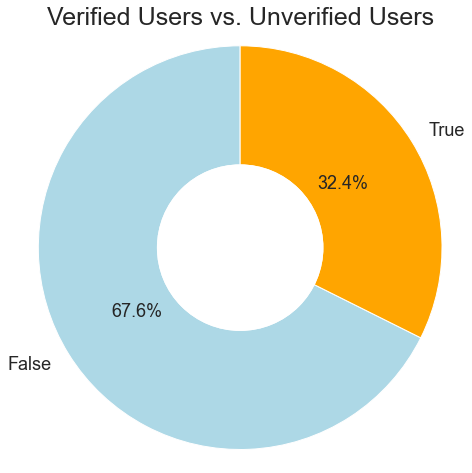

In [866]:
fig, ax = plt.subplots(figsize=(8, 8))
outer = ax.pie(counts, radius=1, colors=['lightblue', 'orange'], labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 18})
inner = ax.pie([1], radius=0.4, colors=['white'], wedgeprops={'linewidth': 5, 'edgecolor': 'white'})

center_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=5)
fig.gca().add_artist(center_circle)

plt.title('Verified Users vs. Unverified Users', fontsize=25)
plt.axis('equal')

plt.show()


In [857]:
unique_users = tw_sentiment['user_screen_name'].nunique()
print(f'There are {unique_users} unique users')

There are 582 unique users


# Who posted the most tweets on these topics?

In [858]:
tw_per_users = tw_sentiment.groupby(['name']).agg(
    number_tweets=('full_text','count')).sort_values('number_tweets', ascending=False)
tw_per_users.head(10)

,number_tweets
name,
The Jerusalem Post,30
Haaretz.com,13
Jewish Community,11
Middle East Eye,11
Bloomberg,10
Andy Vermaut,9
Esther Solomon,8
Al Arabiya English,8
The New Arab,8


 # Popular source type

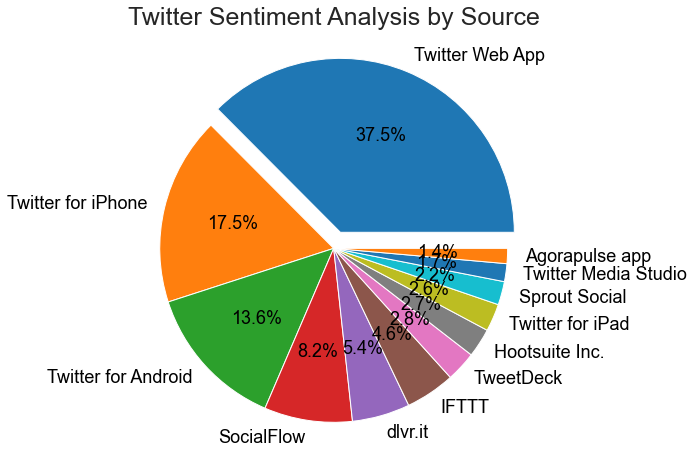

In [863]:
tw_sentiment_counts = tw_sentiment.groupby('source').agg(Source_type=('id', 'count')).sort_values('Source_type', ascending=False)
filtered_sources = tw_sentiment_counts[tw_sentiment_counts['Source_type'] > 10]
filtered_sources.plot.pie(y='Source_type', legend=False, figsize=(8, 8), fontsize=18, autopct='%1.1f%%'
                         , textprops={'color':"black", 'fontsize': 14}, 
                          explode = (0.1, 0.,0,0,0,0,0,0,0,0,0,0))

plt.title('Twitter Sentiment Analysis by Source', fontsize=25)
plt.ylabel('')
plt.show()

# Number of Tweets (Total, Positive, Negative, Neutral)


In [864]:
tweet_list = len(tw_sentiment)
neutral_list  = len(tw_sentiment[tw_sentiment['neu'] != 0])
negative_list  = len(tw_sentiment[tw_sentiment['neg'] != 0])
positive_list  = len(tw_sentiment[tw_sentiment['neu'] != 0])

print(f"total number: {tweet_list}")
print(f"neutral number: {neutral_list}")
print(f"negative number: {negative_list}")
print(f"positive number: {positive_list}")

total number: 865
neutral number: 865
negative number: 726
positive number: 865


# gender guesser

In [957]:
d = gender.Detector()

tw_sentiment['name_gender'] = tw_sentiment['name'].apply(lambda x: d.get_gender(x.split()[0]))

gender_counts = tw_sentiment.groupby('name_gender').size().sort_values(ascending=False)
gender_counts.to_frame()

,0
name_gender,
unknown,500
male,229
female,66
mostly_female,61
mostly_male,7
andy,2


In [1034]:
Israel_tz = pytz.timezone('Israel') 
tw_sentiment['user_created_at'] = tw_sentiment['user_created_at'].dt.tz_convert(Israel_tz)
today = datetime.datetime.now(Israel_tz)
tw_sentiment['user_age'] = (today - tw_sentiment['user_created_at']).dt.total_seconds() / 31536000
avg = round(tw_sentiment['user_age'].mean(),2) 
print(f'The average years since the account creation is {avg}')

The average years since the account creation is 9.38


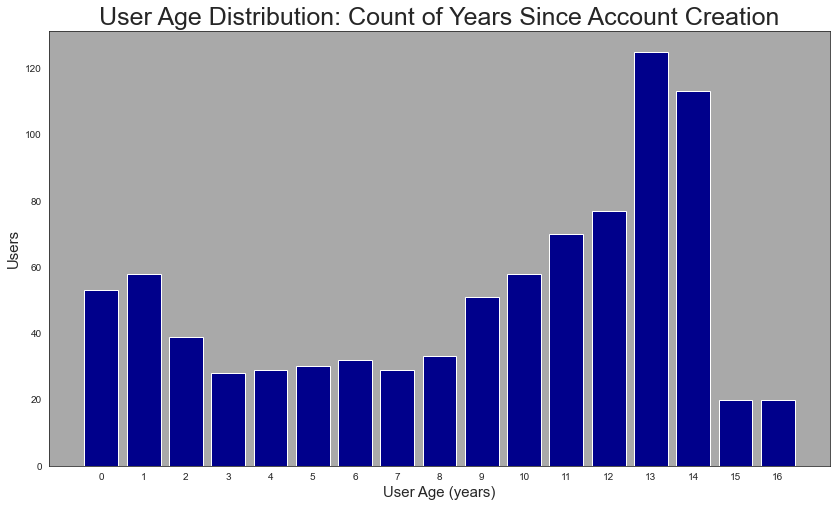

In [1035]:
user_ages = tw_sentiment['user_age']
fig, ax = plt.subplots(figsize=(14,8))

bins = range(user_ages.astype(int).min(), user_ages.astype(int).max()+2)
hist, bins = np.histogram(user_ages, bins=bins)

plt.bar(bins[:-1], hist, width=0.8, align='center', color='darkblue', edgecolor='white')
plt.xticks(bins[:-1])
plt.xlabel('User Age (years)',fontsize=15)
plt.ylabel('Users',fontsize=15)
ax.set_title('User Age Distribution: Count of Years Since Account Creation', fontsize=25)

plt.gca().set_facecolor('darkgray')

plt.show()


For the purpose of the following analysis, I created a new DF that contains unique users only

In [876]:
new_df = tw_sentiment.drop_duplicates(subset=['user_screen_name'], keep='last')
new_df

,id,created_at,full_text,user_screen_name,user_location,user_followers_count,retweet_count,favorite_count,lang,source,...,user_statuses_count,user_created_at,user_verified,text,neg,neu,pos,compound,new_location,name_gender
1,1635770784391077891,2023-03-14 22:32:00+00:00,"Since late January, hundreds of thousands of Israelis have been loudly protesting an impending judicial overhaul by the nation’s new right-wing government. https://t.co/0zSUSDgczB",MotherJones,NaN,829633,40,83,en,Sprout Social,...,258645,2008-12-31 17:21:13+00:00,True,since late january hundred thousand israeli loudly protesting impending judicial overhaul nation ’ new rightwing government,0.167,0.833,0.000,-0.4215,unknown,unknown
2,1635768346686676993,2023-03-14 22:22:19+00:00,The Netanyahu government may have to compromise to win enough public support to pass durable judicial reforms. https://t.co/T66nB83WQv via @WSJopinion,mike_bomb,NaN,33,0,0,en,Twitter Web App,...,11606,2013-11-11 07:25:22+00:00,False,netanyahu government may compromise win enough public support pas durable judicial reform via wsjopinion,0.000,0.649,0.351,0.7579,unknown,male
4,1635731819504042001,2023-03-14 19:57:10+00:00,It’s obscene that the US government is funding demonstrations against Netanyahu’s judicial reform. This is a complete violation of Israeli sovereignty. \n\nHow hypocritical. Election interference at its best!\n\nhttps://t.co/cyIzg1aNn4,GoldsteinBrooke,NaN,34399,27,47,en,Twitter for iPhone,...,14367,2011-10-20 01:41:21+00:00,True,’ obscene u government funding demonstration netanyahu ’ judicial reform complete violation israeli sovereignty hypocritical election interference best,0.391,0.391,0.219,-0.6597,unknown,female
5,1635718584969363456,2023-03-14 19:04:35+00:00,Israel's judicial reform plan explained. For all those that do not really understand the principles involved. https://t.co/BG2JsO9ogR,RickSmol,"Los Angeles, CA",2112,0,1,en,Twitter for iPad,...,82682,2012-11-21 00:37:36+00:00,False,israel s judicial reform plan explained really understand principle involved,0.000,1.000,0.000,0.0000,"United States, CA",male
9,1635696828053061652,2023-03-14 17:38:08+00:00,"Bernard Avishai (@bavishai) discusses the widespread protests against proposed changes to Israel’s judiciary, the state of the Israeli left, Bezalel Smotrich’s comments about Huwara, and Netanyahu’s questionable allies. https://t.co/9cIqL6TIfH",Harpers,"New York, NY",122522,0,0,en,Twitter Web App,...,31283,2008-04-02 20:17:21+00:00,True,bernard avishai bavishai discus widespread protest proposed change israel ’ judiciary state israeli left bezalel smotrich ’ comment huwara netanyahu ’ questionable ally,0.189,0.811,0.000,-0.4939,United States,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1635953221641420801,2023-03-15 10:36:57+00:00,Conservative think tank behind Israel’s judicial reform calls for compromise \nhttps://t.co/n1PPmMx2zO,all_israel_news,NaN,7406,1,3,en,Hootsuite Inc.,...,4799,2020-06-19 00:32:55+00:00,False,conservative think tank behind israel ’ judicial reform call compromise,0.000,1.000,0.000,0.0000,unknown,unknown
271,1635918669510262784,2023-03-15 08:19:39+00:00,"Israel's Netanyahu is set to depart for a visit to Berlin on Wednesday afternoon where he is expected to met by questions from German officials, as well as protests by the Israeli expat community, over the government's judicial overhaul plans\n\n@polina_garaev | @sarahmartinez_7 https://t.co/Gmh91o1Qlc",i24NEWS_EN,Jaffa Port,73892,10,6,en,Wildmoka,...,126765,2013-04-02 12:43:33+00:00,True,israel s netanyahu set depart visit berlin wednesday afternoon expected met question german official well protest israeli expat community government s judicial overhaul plan polinagaraev sarahmartinez,0.077,0.843,0.080,0.0258,Jaffa Port,unknown
449,1634925484852011008,2023-03-12 14:33:05+00:00,"When US? Soon if you keep fuckin with peoples money 😅\n\n⚡️🇮🇱 Israel rocked by country's largest ever pr

# Users with the most friends

In [877]:
users = new_df.groupby(['user_verified','user_screen_name','name']).agg(
    friends=('user_friends_count','sum')).sort_values('friends', ascending=False)
top_users = users[users['friends']>10000]
top_users

friends
user_verified user_screen_name name                                               
False         mcspocky         McSpocky™                                    192754
              realTuckFrumper  #TuckFrump                                   135236
True          AdamMilstein     Adam Milstein                                 39456
False         AndyVermaut      Andy Vermaut                                  34516
              RepublicPaper    Republic Paper ™                              32865
              endtimeslife     End Times Life                                32650
              DenbrotS         Dennis S Brotman 🇺🇸 #DemCast #DemCastGA ☮️    27956
              Chris_1791       Chris 🇺🇸                                      25354
              AgenciaAJN       Agencia AJN                                   22626
              Zendette         Zendette 🇺🇸🇮🇱🇺🇦                               19290
              DrADFinch        Dr. Aikyna D. Finch                           18779
              VictoryDay_Hope  Lee                                           18347
              spencermogapi    Spencer Mogapi                                18239
              MarciaSessler    Marcia Sessler                                18211
              MicheleScott12   Michele Scott                                 17876
              typo_cat         Cat, Reigning Typo Queen👑😷🌻NO DMs             16024
              democraticbear   Adam B. Bear                                  15344
              BasuAshis        Ashis Basu                                    13854
              edrormba         Eli Dror                                      13853
              doxiedebbie      debbie earley                                 13385
True          JohnCornyn       Senator John Cornyn                           13030
False         WaterSolarWind   BostonCubanKid 🇺🇸 🇨🇺 🌈🇺🇦 🌻🌻🌻🌻                 12888
              randlight        Mari R                                        12684
              academic_la      Shaiel Ben-Ephraim                            12184
              citizenyid       Shayna 🇮🇱🇺🇸🇺🇦                                 11199
              FightRacism1     Make America Kind Again                       10500

# Top users by number of tweets

In [878]:
tweets = new_df.groupby(['user_screen_name','name']).agg(
    Num_tweets=('user_statuses_count','sum')).sort_values('Num_tweets', ascending=False)
top_tweets = tweets[tweets['Num_tweets']>200000]
top_tweets

,,Num_tweets
user_screen_name,name,
AndyVermaut,Andy Vermaut,2205340
Chris_1791,Chris 🇺🇸,1870839
AllTheNewsIsNow,🈂️🍆✊🤜🏾The Ambiguously Gay Duo Movie🤛🏾✊🍆🈂️,1563931
IndiaToday,IndiaToday,1137072
RussiaVsNATO,"RUSSIA VS US, EU & NATO",1050310
...,...,...
Bronx2216,Alex C 🏳️‍🌈 🇺🇦 - #stillmasking,207280
rweingarten,Randi Weingarten 🇺🇦🇺🇸💪🏿👩‍🎓,207056
pbrown4348,Paul Brown,202656


# Top users according to two parameters and their sentiment average

In [879]:
filtered_tw_sentiment = new_df[(new_df['user_friends_count'] > 10000) & 
                                     (new_df['user_statuses_count'] > 200000)]
tweets = filtered_tw_sentiment.groupby(['user_screen_name','user_friends_count','user_statuses_count']).agg(
    Sentiment_score=('compound','mean')).sort_values(
    ['user_friends_count','user_statuses_count'], ascending=[False,False])

tweets

,,,Sentiment_score
user_screen_name,user_friends_count,user_statuses_count,
realTuckFrumper,135236,591858,-0.5859
AndyVermaut,34516,2205340,-0.4019
Chris_1791,25354,1870839,-0.2500
MicheleScott12,17876,252889,-0.3818
typo_cat,16024,283640,-0.4588
BasuAshis,13854,375569,0.1027
edrormba,13853,243790,-0.4404
WaterSolarWind,12888,212167,0.2263
randlight,12684,738907,-0.5267


# Exploring the Connection Between Sentiment and Social Influence: 

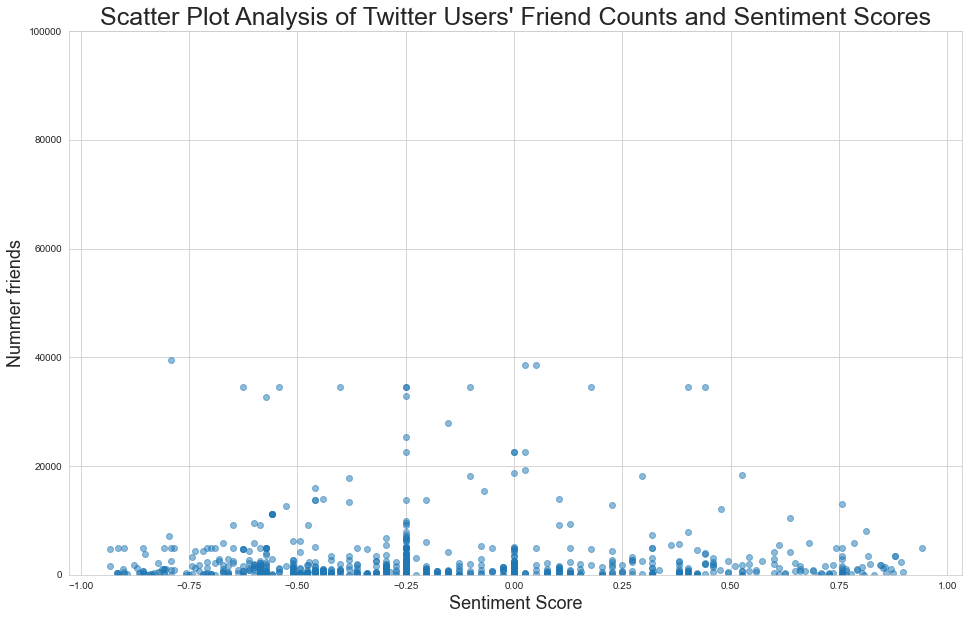

In [889]:
plt.figure(figsize=(16,10))

plt.scatter(tw_sentiment['compound'], tw_sentiment['user_friends_count'], alpha=0.5)

plt.title('Scatter Plot Analysis of Twitter Users\' Friend Counts and Sentiment Scores', fontsize=25)
plt.xlabel('Sentiment Score', fontsize=18)
plt.ylabel('Nummer friends', fontsize=18)
plt.ylim(0, 100000)

plt.show()

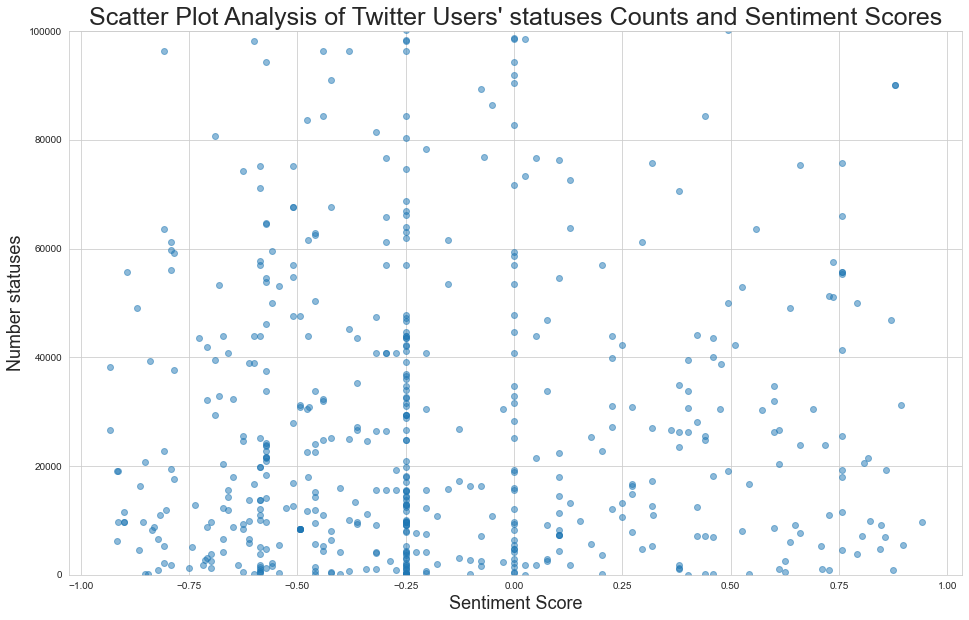

In [888]:
plt.figure(figsize=(16,10))

plt.scatter(tw_sentiment['compound'], tw_sentiment['user_statuses_count'], alpha=0.5)

plt.title('Scatter Plot Analysis of Twitter Users\' statuses Counts and Sentiment Scores', fontsize=25)
plt.xlabel('Sentiment Score', fontsize=18)
plt.ylabel('Number statuses', fontsize=18)
plt.ylim(0, 100000)

plt.show()

# Identifying the Tweets with the Highest Retweet Counts

In [890]:
column_list = ['user_screen_name','full_text','retweet_count']
num_retweet = tw_sentiment['retweet_count'] > 100

pd.set_option('display.max_colwidth', None) 
tw_sentiment[column_list][num_retweet].sort_values('retweet_count', ascending=False)

,user_screen_name,full_text,retweet_count
10,ClaraJeffery,The US media has been far too quiet about the protests riveting Israel. Something like 5% of Israel is in the streets. In the US that would equate to 16.5 million people. So we pulled together some photos to give you a sense of it: https://t.co/3Of2XcDDDG,647
187,cnni,Half a million Israelis took to the streets in the tenth consecutive week of protests against plans by the government of Benjamin Netanyahu to overhaul the country’s judicial system\nhttps://t.co/GLPF3X1BSn,449
207,AJEnglish,Hundreds of thousands of people have rallied in cities across Israel for a 10th week to protest plans by Benjamin Netanyahu’s far-right government to curb the powers of the Supreme Court ⤵️ https://t.co/99rWgKPxlJ,428
170,CNN,Half a million Israelis took to the streets in the tenth consecutive week of protests against plans by the government of Benjamin Netanyahu to overhaul the country’s judicial system\nhttps://t.co/Cj8AX0XnPM,188
175,CartlandDavid,"Israel rocked by country's largest ever protest.\n\nUp to 200,000 have come out in Tel Aviv to protest Netanyahu's judicial reforms, which aim to give the elected government control over choice of judges. #peoplepower https://t.co/ycWLtSJ7wW",169
587,BreitbartNews,The U.S. State Department has been funding a left-wing organization in Israel that is helping to promote anti-government protest aimed at bringing down Prime Minister Benjamin Netanyahu and his judicial reforms. https://t.co/aATyPujxHL,142
156,FareedZakaria,"Will Israel become a “de facto dictatorship”?\n \nAs a highly controversial judicial-reform plan draws tens of thousands to the streets, I talked with two former Israeli leaders: former PM @barak_ehud and former Foreign Minister, vice PM and Justice Minister @Tzipi_Livni https://t.co/qbp3idYVfR",121


c:\users\yakir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
c:\users\yakir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


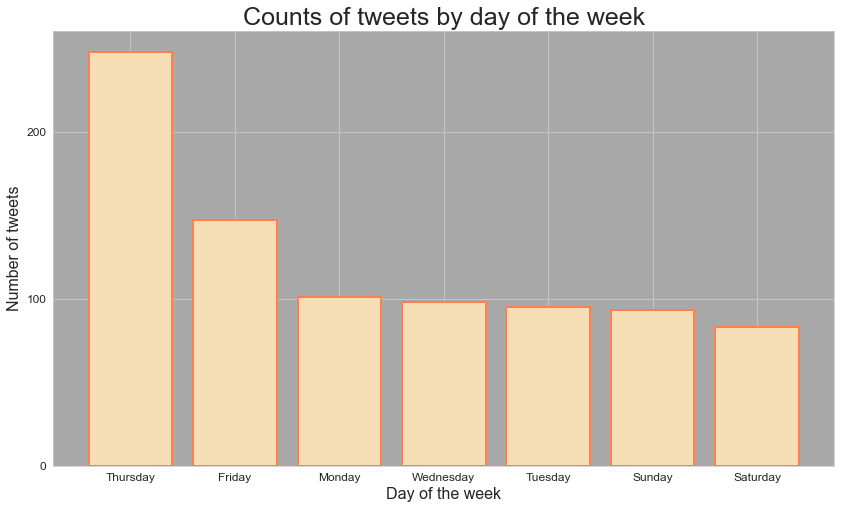

In [909]:
days_of_week = tw_sentiment.created_at.dt.day_name()
counts = days_of_week.value_counts()

fig, ax = plt.subplots(figsize=(14,8))
ax.bar(counts.index, counts.values,color='wheat',  edgecolor='coral', linewidth=2)
ax.set_xlabel('Day of the week', fontsize=16)
ax.set_ylabel('Number of tweets', fontsize=16)
ax.set_title('Counts of tweets by day of the week', fontsize=25)
ax.set_xticklabels(counts.index, fontsize=12)
ax.set_yticklabels(counts.values, fontsize=12)
ax.set_facecolor('darkgray')

ax.set_yticks(range(0, max(counts.values) + 1, 100))
ax.set_yticklabels(range(0, max(counts.values) + 1, 100), fontsize=12)

plt.show()

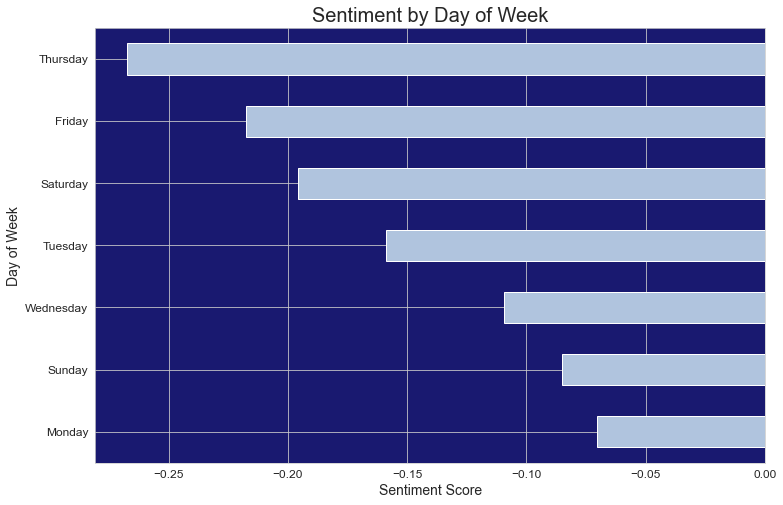

In [903]:
sentiment_by_day = tw_sentiment.groupby(days_of_week)['compound'].mean()

sentiment_by_day_sorted = sentiment_by_day.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sentiment_by_day_sorted.plot(kind='barh', ax=ax,fontsize=12,color='lightsteelblue')
ax.set_xlabel('Sentiment Score',fontsize=14)
ax.set_ylabel('Day of Week',fontsize=14)
ax.set_title('Sentiment by Day of Week',fontsize=20)
ax.set_facecolor('midnightblue')
plt.show()

# Word Cloud

[('judicial', 640), ('israel', 579), ('protest', 523), ('netanyahu', 495), ('government', 487), ('reform', 437), ('s', 423), ('israeli', 355), ('plan', 327), ('overhaul', 172), ('court', 170), ('compromise', 140), ('minister', 135), ('benjamin', 117), ('people', 116), ('supreme', 112), ('prime', 110), ('country', 91), ('system', 77), ('power', 75), ('judiciary', 69), ('week', 68), ('president', 68), ('street', 67), ('say', 66)]


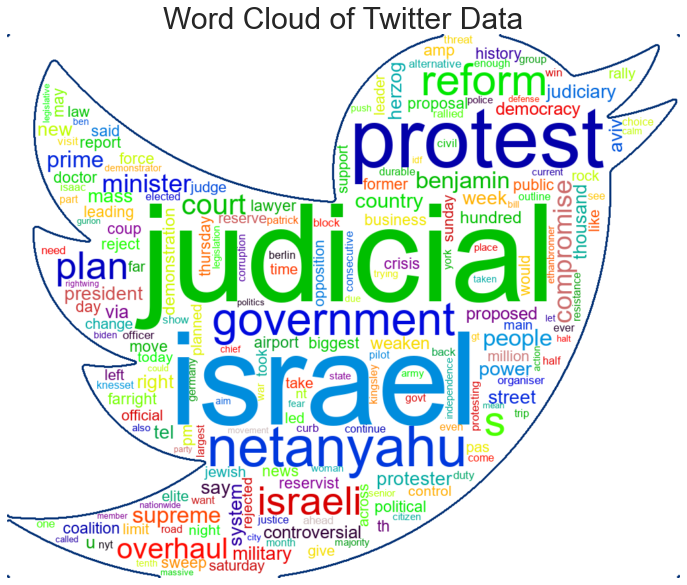

In [910]:
tokens = word_tokenize(' '.join(tw_sentiment['text'].tolist()))
filtered_tokens = [word for word in tokens if word.isalpha()]

freq_dist = nltk.FreqDist(filtered_tokens)
mask = np.array(Image.open(r'c:\Users\Yakir\twitter_mask.png'))

print(freq_dist.most_common(25))

wordcloud = WordCloud(mask=mask,background_color='white',contour_width=3,
                      contour_color='#023075',colormap='nipy_spectral',font_path='arial.ttf'
                     ).generate_from_frequencies(freq_dist)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Twitter Data', fontsize=30)
plt.show()

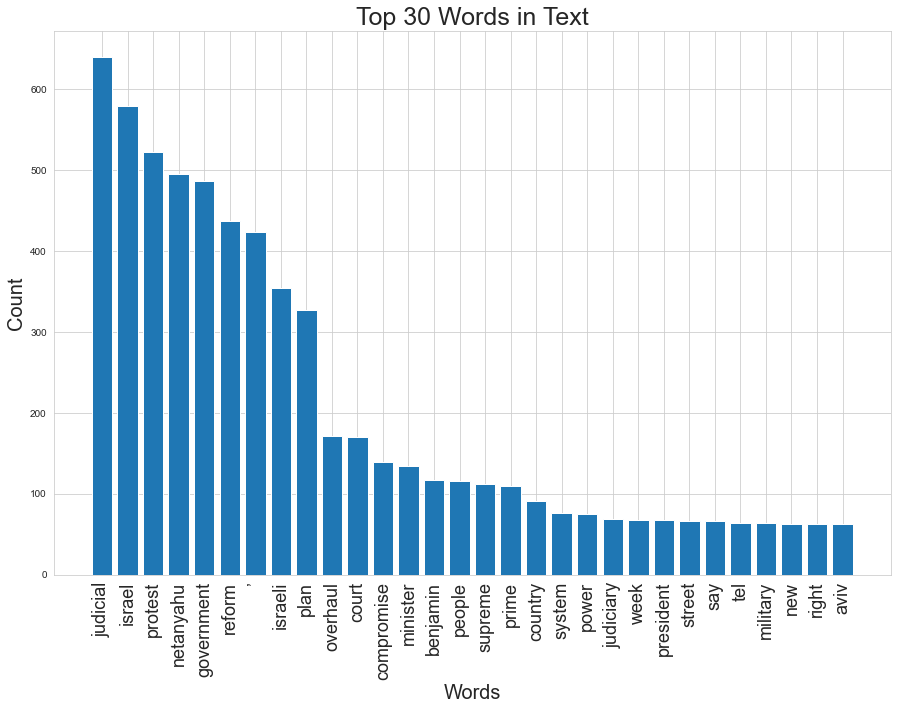

In [913]:
words = []
for text in tw_sentiment['text']:
    words += text.split()

word_counts = collections.Counter(words)

top_words = dict(word_counts.most_common(30))

fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=90, fontsize=18)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 30 Words in Text', fontsize=25)
plt.show()


In [912]:
tw_sentiment['text'] = tw_sentiment['text'].str.replace(r'\bs\b', '')
tw_sentiment['text'] = tw_sentiment['text'].str.replace(r'\b\'\b', '')

# Popular words and their sentiment

In [1028]:
words = tw_sentiment['text'].str.lower().str.split()
words = words.apply(remove_stopwords)
words = [word for tweet in words for word in tweet]
word_counts = Counter(words)
Popular_words = pd.DataFrame(columns=['word', 'count', 'sentiment'])

for word, count in word_counts.most_common(100):
    sentiment = sid.polarity_scores(word)['compound']
    Popular_words = df.append({'word': word, 'count': count, 'sentiment': sentiment}, ignore_index=True)

pd.set_option('display.max_rows', None)
Popular_words

,word,count,sentiment
0,judicial,640,0.0000
1,israel,579,0.0000
2,protest,523,-0.2500
3,netanyahu,495,0.0000
4,government,487,0.0000
5,reform,437,0.0000
6,’,424,0.0000
7,israeli,355,0.0000
8,plan,327,0.0000
9,overhaul,172,0.0000


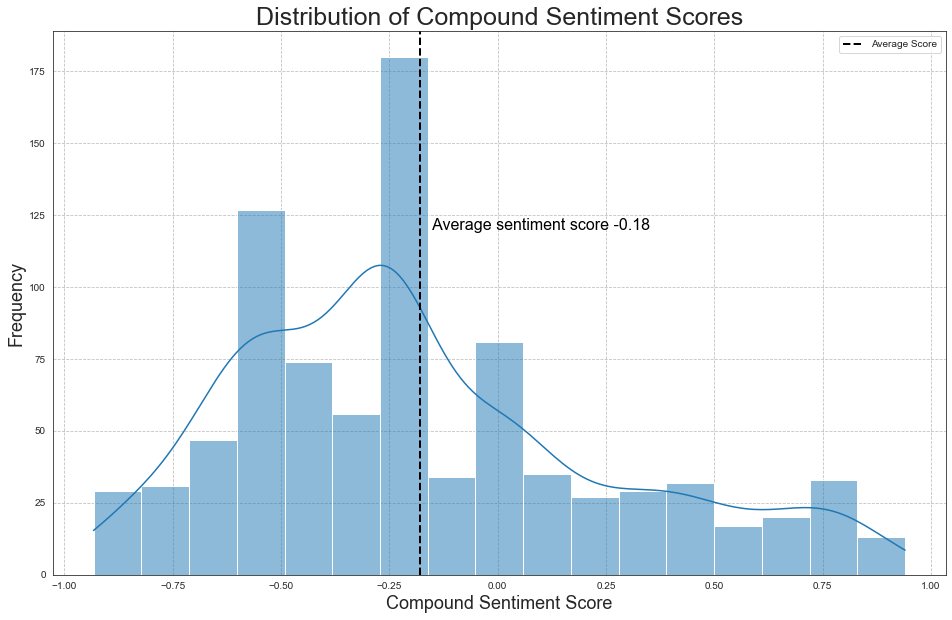

In [1021]:
avg_score = tw_sentiment['compound'].mean()

fig, ax = plt.subplots(figsize=(16,10))
sns.histplot(tw_sentiment['compound'], kde=True)
ax.axvline(x=avg_score, linestyle='--', color='black', linewidth=2, label='Average Score')
ax.grid(True, which='major', color='gray', linestyle='--', alpha=0.5)


ax.legend()
ax.set_xlabel('Compound Sentiment Score', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_title('Distribution of Compound Sentiment Scores', fontsize=25)

ax.text(avg_score + 0.01, 120, f'  Average sentiment score {avg_score:.2f}', fontsize=16, color='black')


plt.show()


No handles with labels found to put in legend.


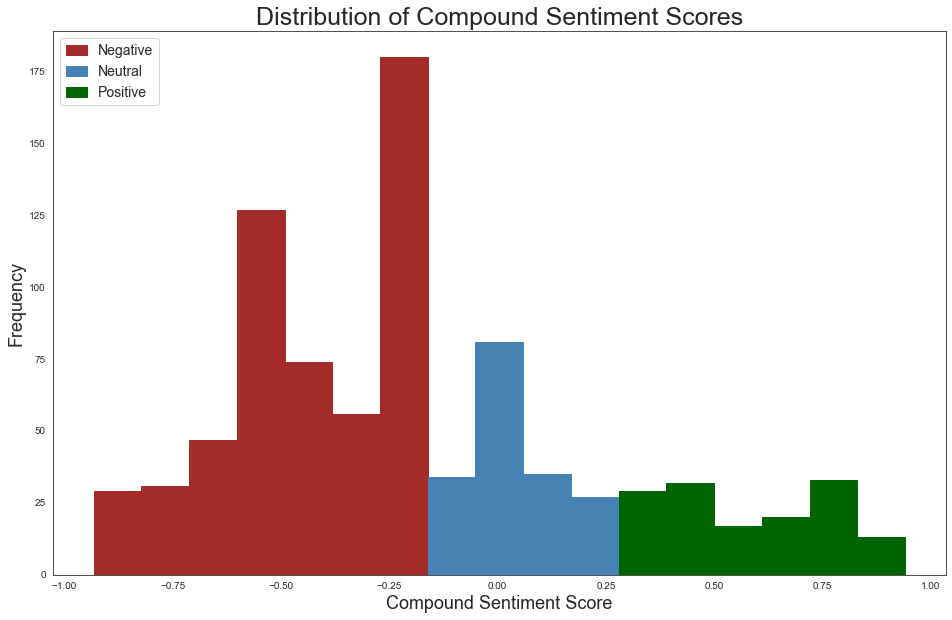

In [1022]:
fig, ax = plt.subplots(figsize=(16,10))
sns.histplot(tw_sentiment['compound'])

ax.legend()
ax.set_xlabel('Compound Sentiment Score', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_title('Distribution of Compound Sentiment Scores', fontsize=25)

colors = ['brown', 'steelblue', 'darkgreen']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in range(len(colors))]
legend_labels = ['Negative', 'Neutral', 'Positive']
ax.legend(handles, legend_labels, loc='upper left', fontsize=14, handlelength=1.5)

for rect in ax.patches:
    if rect.get_x() < -0.25:
        rect.set_color('brown')
    elif rect.get_x() < 0.25:
        rect.set_color('steelblue')
    else:
        rect.set_color('darkgreen')
        
plt.show()


# The most negative tweets

In [947]:
column_list = ['user_screen_name','full_text','text','neg']
new_column_names = {'text': 'lemmatize_text', 'neg': 'negative_score'}

new_df[column_list].rename(columns=new_column_names).sort_values('negative_score', ascending=False).head()

,user_screen_name,full_text,lemmatize_text,negative_score
154,citizenyid,@NirBarkat Stop judicial reform.\nCorruption is contagious.\nhttps://t.co/PTienPYsVp,nirbarkat stop judicial reform corruption contagious,0.535
344,Lynguist716,"EXACTLY....Autocrats &amp; Dictators SHOULD have to run and hide! This Jewish women is outraged by this Fascist Israeli Government, full of criminals.\nIsraelis protesting judicial reform force Netanyahu airlift https://t.co/BW9RsB9XXW",exactly autocrat amp dictator run hide jewish woman outraged fascist israeli government full criminal israeli protesting judicial reform force netanyahu airlift,0.484
216,deji_of_lagos,Protests resume in Israel after Netanyahu rejects compromise PM Netanyahu rejected a proposal from President Herzog that had attempted to diffuse the country's judicial crisis.,protest resume israel netanyahu reject compromise pm netanyahu rejected proposal president herzog attempted diffuse country s judicial crisis,0.482
240,alexandratali25,Herzog Presents Judicial Compromise Amid Fear Of Escalating Political Violence - I24NEWS https://t.co/odORGPfuCk,herzog present judicial compromise amid fear escalating political violence inews,0.477
559,ThomasBrownStu1,Israeli's are protesting Netanyahu's fascist right wing government after Netanyahu has tried to overturn the judicial system to keep himself out of prison. https://t.co/A3Q6XEwCCC,israeli s protesting netanyahu s fascist right wing government netanyahu tried overturn judicial system keep prison,0.469


# The most positive tweets

In [948]:
column_list = ['user_screen_name', 'full_text', 'text', 'pos']
new_column_names = {'text': 'lemmatize_text', 'pos': 'positive_score'}

new_df[column_list].rename(columns=new_column_names).sort_values('positive_score', ascending=False).head()

,user_screen_name,full_text,lemmatize_text,positive_score
161,commondreams,"On mass demonstrations, false hope, and why Israel's Supreme Court is no friend of the Palestinian people. https://t.co/TPr7LNeSrn",mass demonstration false hope israel s supreme court friend palestinian people,0.649
336,jewishwebsight,Justice minister hails proposed compromise on Israeli Supreme Court reform https://t.co/vjai0pNCtw,justice minister hail proposed compromise israeli supreme court reform,0.580
551,BrianGoredemaBr,An excellent appraisal of the Israeli government determination to take justice an human rights away from Palestinians \nhttps://t.co/34zHSD9PLV,excellent appraisal israeli government determination take justice human right away palestinian,0.551
465,NewsraelApp,Israeli Justice Minister hails compromise proposal on judicial reform\n\nhttps://t.co/GZTiIRciQJ,israeli justice minister hail compromise proposal judicial reform,0.439
93,RockfordLiberty,"FASCISM: Netanyahu’s government plans to allow a simple majority of 61 in the 120-seat Knesset to override almost any supreme court ruling, and to allow politicians to appoint most of the justices to the bench. https://t.co/6lb9yk79Yn",fascism netanyahu ’ government plan allow simple majority seat knesset override almost supreme court ruling allow politician appoint justice bench,0.412


# Conclusions

This project focused on analyzing public opinion on the ongoing protests in Israel using Twitter data. The results provide valuable insights into various aspects related to the ongoing protests in Israel, including the characteristics of Twitter users involved in the protests, the most frequently used words in the tweets, the prevailing sentiment surrounding the protests, and significant trends or patterns in the tweets or user characteristics.

First, we can see that there is a significant amount of international interest in the protests, as a large number of tweets came from outside of Israel. The United States had the highest number of tweets, followed by Israel, which suggests that people around the world are paying attention to this issue.

Second, we can see that the sentiment of the tweets tended to be negative overall, with an average sentiment score of -0.18. This negative sentiment was particularly strong on Thursdays, which may be related to the fact that many of the protests took place on that day.

Third, we can see that there is a lot of media coverage of the protests, but there were still many tweets from private individuals expressing their opinions. The majority of these individuals appeared to be opposed to the legal revolution promoted by the government.

Fourth, the sentiment analysis of tweets posted by influential Twitter users showed that most of their tweets expressed negative sentiments toward the ongoing protests in Israel. However, it's important to note that while there is a correlation between high social involvement and negative sentiment, it's not clear whether there is a causal relationship between the two.

Finally, we should note that the results returned by VADER on the sentiment analysis were not always accurate, which suggests that this tool should be used with caution when analyzing Twitter data.

Overall, the analysis of Twitter data provides valuable insights into public opinion on the ongoing protests in Israel. By understanding the sentiment and characteristics of Twitter users involved in this issue, we can gain a better understanding of the underlying causes and motivations behind the protests. 